# Introduction
We are working with a dataset that contains information about Airbnb listings in the US. Our goal is to predict the price of a stay in these listings. The dataset consists of 74411 listings and 29 columns. One of the columns, log_price, is the target variable that we are trying to predict

# 6 ve 7 nci kısımlar yapıldıkça güncellenecek!

<font color = 'yellow'>
Content: 

1. [Load and Check Data](#1)
1. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)
1. [Basic Data Analysis](#6)
1. [Outlier Detection](#7)
1. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)
1. [Visualization](#11)
    * [Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived](#12)
    * [SibSp -- Survived](#13)
    * [Parch -- Survived](#14)
    * [Pclass -- Survived](#15)
    * [Age -- Survived](#16)
    * [Pclass -- Survived -- Age](#17)
    * [Embarked -- Sex -- Pclass -- Survived](#18)
    * [Embarked -- Sex -- Fare -- Survived](#19)
    * [Fill Missing: Age Feature](#20)
1. [Feature Engineering](#21)
    * [Name -- Title](#22)
    * [Family Size](#23)
    * [Embarked](#24)
    * [Ticket](#25)
    * [Pclass](#26)
    * [Sex](#27)
    * [Drop Passenger ID and Cabin](#28)
1. [Modeling](#29)
    * [Train - Test Split](#30)
    * [Simple Logistic Regression](#31)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#32) 
    * [Ensemble Modeling](#33)
    * [Prediction and Submission](#34)

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

C:\Users\karakurt\AppData\Local\Temp\ipykernel_2972\749813131.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


1. <a id = "1"></a><br>
# Load and Check Data

In [4]:
cwd = os.getcwd()  # your current working directory (cwd)
files = os.listdir(cwd)  # This will Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'c:\\Users\\karakurt\\Documents\\GitHub\\ML_Project_Group_B': ['.git', 'Column_Descriptions.xlsx', 'Feature_Engineering.ipynb', 'Main.ipynb', 'Missing_Values.ipynb', 'modelling.ipynb', 'Outliers.ipynb', 'README.md', 'train.csv', 'Visualization.ipynb', 'zipcode_LA_DC_NY.csv', 'zipcode_usa.csv']


In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [7]:
#pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [8]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [20]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


<a id = "2"></a><br>
# Variable Description
# Yazılacak!!!
1. Id: 

2. log_price:0,.....7,6         0....4,78....7,6  (min,mean,max)

3. property_type: Apartment, House, Condominium, Loft, Townhouse, Hostel, Guest suite, Bed & Breakfast, Bungalow, Guesthouse, Dorm, Other, Camper/RV, Villa, Boutique hotel, Timeshare, In-law, Boat, Serviced apartment, Castle, Cabin, Treehouse, Tipi, Vacation home, Tent, Hut, Casa particular, Chalet, Yurt, Earth House, Parking Space, Train, Cave, Lighthouse, Island
4. room_type: Entire home/apt, Private room, Shared room

5. amenities:   TV Cable_TV Wireless_Internet Air_conditioning Kitchen Breakfast Buzzer_wireless_intercom Heating Family_kid_friendly Smoke_detector Carbon_monoxide_detector Fire_extinguisher Essentials Shampoo Hangers Hair_dryer Iron Laptop_friendly_workspace translation_missing__en_hosting_amenity_50

6. accommodates:1,2,3.....16             1...3,15....16  (min,mean,max)

7. bathrooms:0,1,2,....8       1....1,23....8 (min,mean,max)

8. bed_type:   Real Bed, Futon, Pull-out Sofa, Couch, Airbed 

9. cancellation_policy: strict, moderate, flexible, super_strict_30, super_strict_60

10. cleaning_fee:True, False

11. city:  NYC, SF, DC, LA, Chicago, Boston  

12. description:

13. first_review:  date

14. host_has_profile_pic:   t, nan, f

15. host_identity_verified:  t, nan, f

16. host_response_rate:nan, 100%, 71%, 68%, 67%, 83%, 50%, 90%, 86%, 92%, 82%, 80%, 89%, 93%, 99%, 0%, 88%, 96%, 70%, 94%, 91%, 25%, 95%, 98%, 62%, 29%, 33%, 81%, 63%, 38%, 60%, 79%, 78%, 75%, 65%, 97%, 87%, 40%, 54%, 53%, 58%, 76%, 30%, 64%, 17%, 20%, 77%, 73%, 41%, 59%, 57%, 85%, 56%, 42%, 44%, 35%, 14%, 74%, 27%, 10%, 84%, 6%, 72%, 36%, 55%, 43%, 13%, 39%, 46%, 26%, 61%, 52%, 23%, 22%, 69%, 66%, 15%, 11%, 31%, 21%, 47%

17. host_since: date

18. instant_bookable:  f, t

19. last_review: date

20. latitude: enlem

21. longitude:  boylam

22. name:

23. neighbourhood: mahalle

24. number_of_reviews: toplam inceleme sayisi             0,..20,05...605(min,mean,max)

25. review_scores_rating:    degerlendirme/oylama puani   20...94,06..100 (min,mean,max)

26. thumbnail_url:   photos

27. zipcode:  post kod

28. bedrooms: 0,1,2,3,.....,10

29. beds: 0,1,2,3,...18

In [10]:
# Check Unique, Missing and Duplicated values

summary = pd.DataFrame(index=df.columns)
summary["Unique"] = df.nunique().values
summary["Missing"] = df.isnull().sum()
summary["Duplicated"] = df.duplicated().sum()
summary["Types"] = df.dtypes
summary_styled = summary.style.background_gradient()
    
summary_styled

,Unique,Missing,Duplicated,Types
id,74111,0,0,int64
log_price,767,0,0,float64
property_type,35,0,0,object
room_type,3,0,0,object
amenities,67122,0,0,object
accommodates,16,0,0,int64
bathrooms,17,200,0,float64
bed_type,5,0,0,object
cancellation_policy,5,0,0,object
cleaning_fee,2,0,0,bool


<Axes: >

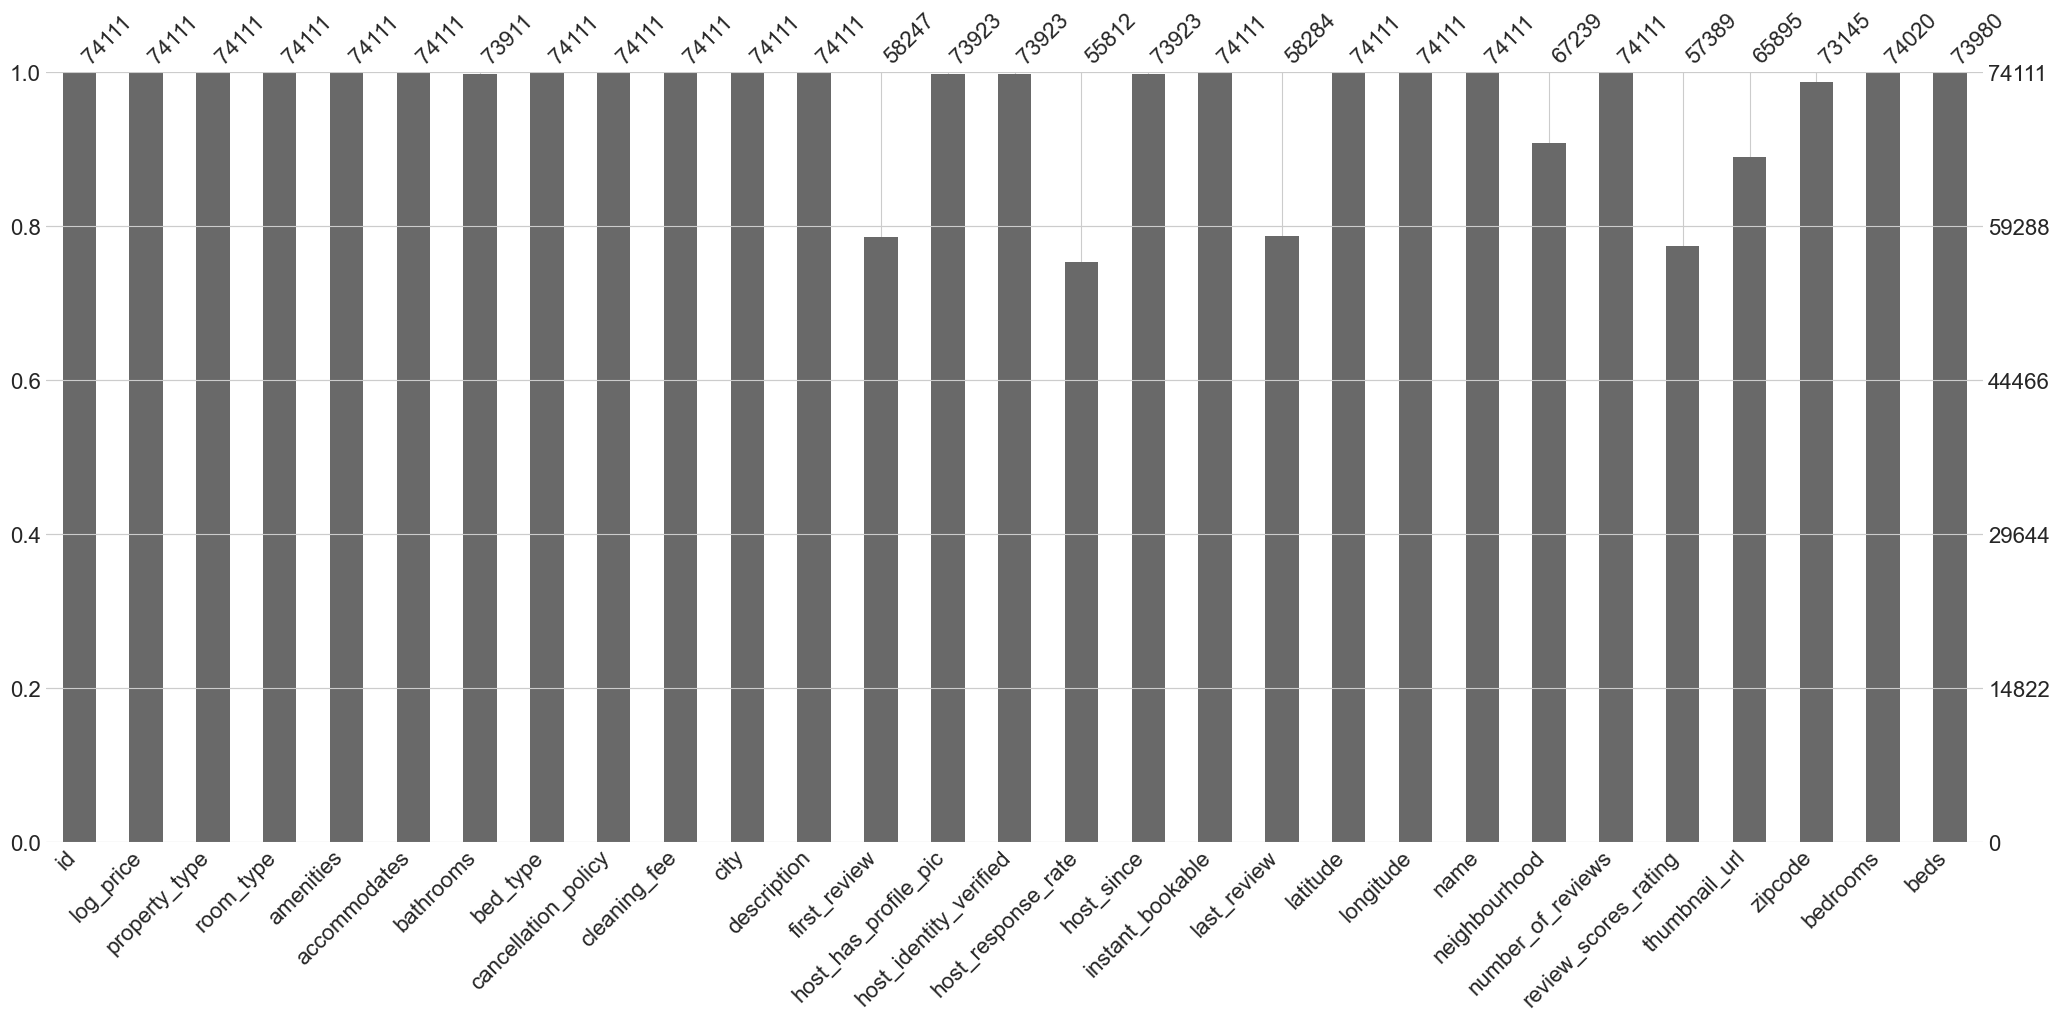

In [11]:
import missingno as msno
msno.bar(df)

* BU KISMA GEREK VAR MI?
* bool(1): 'cleaning_fee'
* int64(3): 'id', 'accommodates', 'number_of_reviews'
* float64(7): 'log_price', 'bathrooms', 'latitude', 'longitude','review_scores_rating', 'bedrooms', 'beds'
* object(18): 'property_type', 'room_type', 'amenities', 'bed_type','cancellation_policy', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate','host_since', 'instant_bookable', 'last_review', 'name',
       'neighbourhood', 'thumbnail_url', 'zipcode'


In [10]:
pd.set_option('display.max_colwidth', 0)
df[['property_type','room_type','bed_type','cancellation_policy',
      'cleaning_fee','city','host_has_profile_pic','host_identity_verified',
     'host_response_rate','instant_bookable','neighbourhood']].agg(['unique']).transpose()

,unique
property_type,"[Apartment, House, Condominium, Loft, Townhouse, Hostel, Guest suite, Bed & Breakfast, Bungalow, Guesthouse, Dorm, Other, Camper/RV, Villa, Boutique hotel, Timeshare, In-law, Boat, Serviced apartment, Castle, Cabin, Treehouse, Tipi, Vacation home, Tent, Hut, Casa particular, Chalet, Yurt, Earth House, Parking Space, Train, Cave, Lighthouse, Island]"
room_type,"[Entire home/apt, Private room, Shared room]"
bed_type,"[Real Bed, Futon, Pull-out Sofa, Couch, Airbed]"
cancellation_policy,"[strict, moderate, flexible, super_strict_30, super_strict_60]"
cleaning_fee,"[True, False]"
city,"[NYC, SF, DC, LA, Chicago, Boston]"
host_has_profile_pic,"[t, nan, f]"
host_identity_verified,"[t, f, nan]"
host_response_rate,"[nan, 100%, 71%, 68%, 67%, 83%, 50%, 90%, 86%, 92%, 82%, 80%, 89%, 93%, 99%, 0%, 88%, 96%, 70%, 94%, 91%, 25%, 95%, 98%, 62%, 29%, 33%, 81%, 63%, 38%, 60%, 79%, 78%, 75%, 65%, 97%, 87%, 40%, 54%, 53%, 58%, 76%, 30%, 64%, 17%, 20%, 77%, 73%, 41%, 59%, 57%, 85%, 56%, 42%, 44%, 35%, 14%, 74%, 27%, 10%, 84%, 6%, 72%, 36%, 55%, 43%, 13%, 39%, 46%, 26%, 61%, 52%, 23%, 22%, 69%, 66%, 15%, 11%, 31%, 21%, 47%]"
instant_bookable,"[f, t]"


In [11]:
#check colums  with values
index= ["host_response_rate","property_type", "room_type","accommodates","bathrooms","bed_type", "cancellation_policy", "cleaning_fee",
       "city","instant_bookable", "beds", "bedrooms", "neighbourhood","first_review", "last_review","zipcode",
       "name","host_since","thumbnail_url", "latitude", "longitude", 
        "host_has_profile_pic", "host_identity_verified"]

for i in index:
    
    print(df[i].value_counts(), "\n")
    print("---------------------------------------------------------------")

host_response_rate
100%    43254
90%     2277 
80%     1113 
0%      883  
50%     611  
70%     508  
99%     448  
67%     433  
98%     425  
94%     401  
97%     400  
96%     350  
60%     337  
95%     322  
88%     316  
75%     315  
92%     315  
89%     310  
93%     307  
83%     279  
86%     243  
91%     224  
33%     142  
40%     120  
78%     116  
71%     106  
87%     90   
81%     88   
82%     82   
25%     80   
68%     71   
85%     62   
84%     62   
63%     58   
57%     57   
73%     49   
79%     45   
20%     45   
56%     44   
30%     38   
76%     29   
74%     24   
77%     24   
64%     23   
43%     22   
54%     21   
44%     19   
29%     18   
58%     17   
10%     16   
65%     15   
72%     15   
17%     15   
38%     15   
53%     14   
55%     13   
69%     12   
46%     8    
62%     7    
14%     6    
52%     5    
36%     5    
35%     5    
42%     5    
59%     4    
61%     4    
66%     3    
22%     3    
26%     3    
11%     2    
4

bed_type
Real Bed         72028
Futon              753
Pull-out Sofa      585
Airbed             477
Couch              268
Name: count, dtype: int64    real bed ve digerleri.....

                            ##missing value 

<AxesSubplot:>

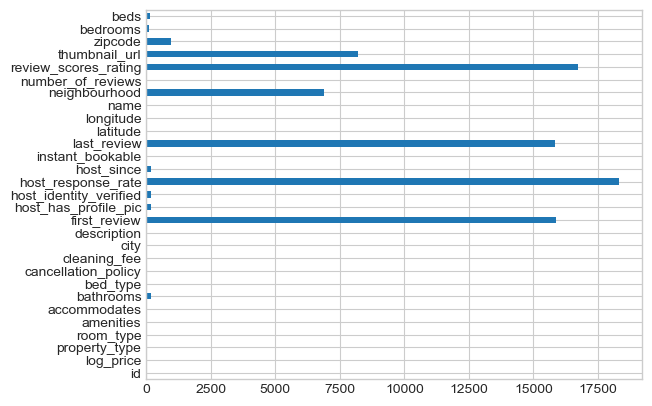

In [23]:
#misiing valuelari görsellestirme
df.isnull().sum().plot.barh()

In [25]:
# check out missing data   #topluca  missing value sayi ve yuzdeleri
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_df.head(29)

,Total,Percent
host_response_rate,18299,0.246913
review_scores_rating,16722,0.225635
first_review,15864,0.214057
last_review,15827,0.213558
thumbnail_url,8216,0.110861
neighbourhood,6872,0.092726
zipcode,966,0.013035
bathrooms,200,0.002699
host_identity_verified,188,0.002537
host_since,188,0.002537


* DATA CLEANING 

In [ ]:
df['amenities']=df['amenities'].replace(r'["]', '', regex=True)
df['name'] = df['name'].apply(lambda x: re.sub(r"[\*\-]|(\s*#\d+)", "", x))

property_type

In [22]:
df['property_type'].unique()

array(['Apartment', 'House', 'Condominium', 'Loft', 'Townhouse', 'Hostel',
       'Guest suite', 'Bed & Breakfast', 'Bungalow', 'Guesthouse', 'Dorm',
       'Other', 'Camper/RV', 'Villa', 'Boutique hotel', 'Timeshare',
       'In-law', 'Boat', 'Serviced apartment', 'Castle', 'Cabin',
       'Treehouse', 'Tipi', 'Vacation home', 'Tent', 'Hut',
       'Casa particular', 'Chalet', 'Yurt', 'Earth House',
       'Parking Space', 'Train', 'Cave', 'Lighthouse', 'Island'],
      dtype=object)

In [26]:
df['property_type'].value_counts()

property_type
Apartment             49003
House                 16511
Condominium           2658 
Townhouse             1692 
Loft                  1244 
Other                 607  
Guesthouse            498  
Bed & Breakfast       462  
Bungalow              366  
Villa                 179  
Dorm                  142  
Guest suite           123  
Camper/RV             94   
Timeshare             77   
Cabin                 72   
In-law                71   
Hostel                70   
Boutique hotel        69   
Boat                  65   
Serviced apartment    21   
Tent                  18   
Castle                13   
Vacation home         11   
Yurt                  9    
Hut                   8    
Treehouse             7    
Chalet                6    
Earth House           4    
Tipi                  3    
Train                 2    
Cave                  2    
Casa particular       1    
Parking Space         1    
Lighthouse            1    
Island                1    
Name: 

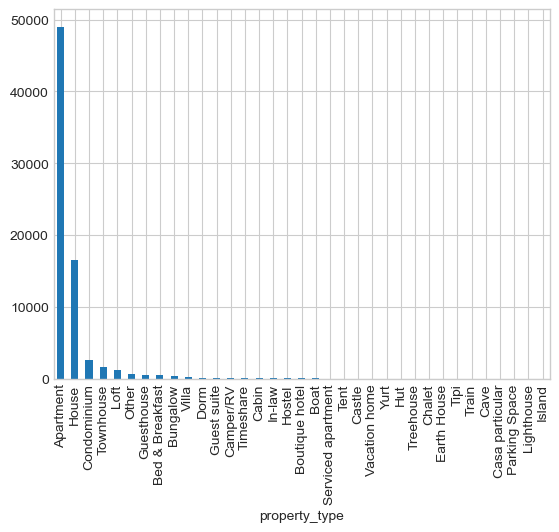

In [42]:
df['property_type'].value_counts().sort_values(ascending=False).plot(kind='bar');

In [30]:
df['property_type'].isnull().sum()

0

                 ###accommodates

In [34]:
df['accommodates'].unique()

array([ 3,  7,  5,  4,  2,  6,  8,  1,  9, 10, 16, 11, 12, 14, 13, 15],
      dtype=int64)

In [35]:
df['accommodates'].value_counts()

accommodates
2     31854
4     12066
1     9434 
3     7794 
6     4969 
5     3444 
8     1795 
7     946  
10    701  
16    301  
9     270  
12    264  
14    104  
11    79   
15    54   
13    36   
Name: count, dtype: int64

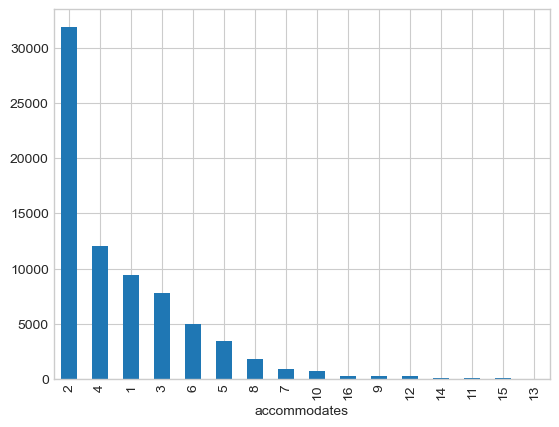

In [40]:
df['accommodates'].value_counts().sort_values(ascending=False).plot(kind='bar');

In [36]:
df['accommodates'].isnull().sum()

0

                             ###bed_type

In [37]:
df['bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Couch', 'Airbed'],
      dtype=object)

In [38]:
df['bed_type'].value_counts()

bed_type
Real Bed         72028
Futon            753  
Pull-out Sofa    585  
Airbed           477  
Couch            268  
Name: count, dtype: int64

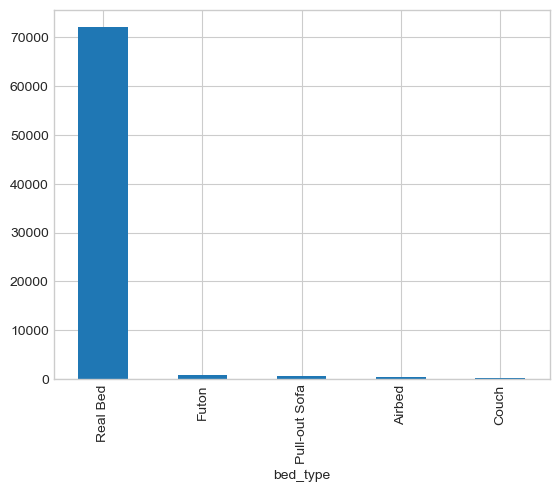

In [13]:
df['bed_type'].value_counts().sort_values(ascending=False).plot(kind='bar');

In [39]:
df['bed_type'].isnull().sum()

0

                   ###instant_bookable

In [43]:
df['instant_bookable'].unique()

array(['f', 't'], dtype=object)

In [44]:
df['instant_bookable'].value_counts()

instant_bookable
f    54660
t    19451
Name: count, dtype: int64

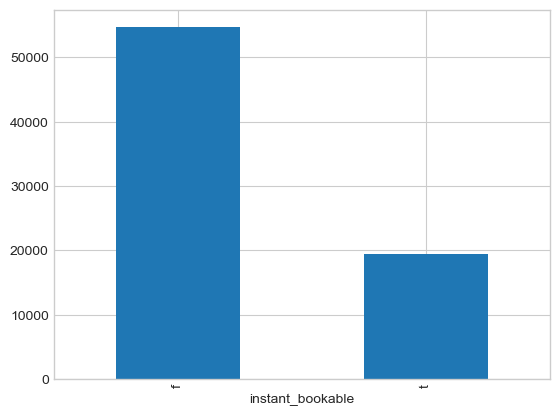

In [45]:
df['instant_bookable'].value_counts().sort_values(ascending=False).plot(kind='bar');

In [46]:
df['instant_bookable'].isnull().sum()

0

          ####longitude

In [51]:
df['longitude'].unique()

array([ -73.99161685,  -73.98903992,  -73.94375584, ...,  -73.94237732,
        -74.00015737, -118.19240918])

In [52]:
df['longitude'].value_counts()

longitude
-73.991617     1
-73.953315     1
-73.932585     1
-76.976165     1
-118.451806    1
              ..
-73.960735     1
-73.980426     1
-87.619302     1
-87.681281     1
-118.192409    1
Name: count, Length: 74111, dtype: int64

In [53]:
df['longitude'].isnull().sum()

0

                       ###number_of_reviews

In [54]:
df['number_of_reviews'].unique()

array([  2,   6,  10,   0,   4,   3,  15,   9, 159,  82,  29,  13,  12,
        26,   5,  57,  73,  14,   1,  40, 248,  46,  17, 138,  11,  44,
        34,  85,  18,  31,  30,  19,  25,  22,  23,  28,   7,  32, 144,
        16,  38, 105,  59,  67,  21, 120,   8,  61,  87, 206,  43, 104,
        47,  63, 186,  36,  27, 167,  48, 102,  51, 126,  81,  58,  72,
        68, 107,  79,  98,  39, 187, 123,  70,  78,  55,  54,  52,  42,
        75, 128,  60,  90, 254, 135,  64,  99, 191,  24,  66, 139, 125,
       129,  74, 318,  33,  35,  37,  20,  93,  83,  45,  41,  49, 289,
       190,  62,  88, 127, 154, 118, 216, 136,  69, 314, 112,  77,  56,
       181,  53, 117, 101, 106, 255, 114, 110, 192,  76, 113,  91, 182,
        84, 146, 119,  86,  50,  71, 157,  95,  94, 158, 142,  97, 194,
       173, 122, 132, 171, 111, 161, 208, 131, 384, 133, 116, 134, 148,
        89, 156, 179, 150, 147, 145, 202, 258, 178, 200, 155, 163, 149,
       267, 100,  65, 207, 242, 172, 121, 180,  80,  92, 263, 19

In [55]:
df['number_of_reviews'].value_counts()

number_of_reviews
0      15819
1      7106 
2      4750 
3      3661 
4      2912 
       ...  
370    1    
254    1    
449    1    
314    1    
341    1    
Name: count, Length: 371, dtype: int64

!!!  0 olma durumu incelenmeli,belki yeni bir ev olabilir

In [57]:
df['number_of_reviews'].isnull().sum()

0

              ###bedrooms

In [58]:
df['bedrooms'].unique()

array([ 1.,  3.,  2.,  0.,  4., nan,  5.,  6.,  7.,  8.,  9., 10.])

In [59]:
df['bedrooms'].value_counts()

bedrooms
1.0     49784
2.0     11351
0.0     6715 
3.0     4309 
4.0     1330 
5.0     355  
6.0     106  
7.0     38   
8.0     14   
10.0    10   
9.0     8    
Name: count, dtype: int64

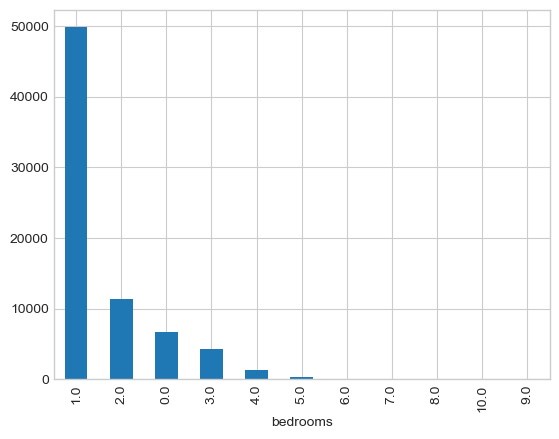

In [60]:
df['bedrooms'].value_counts().sort_values(ascending=False).plot(kind='bar');

In [66]:
df['bedrooms'].isnull().sum()

91

            ###bedrooms none değerlerinin karşılığını tüm sütunlarla bilrlikte gösteriyor

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nan_rows = df[df['bedrooms'].isna()]
print(nan_rows)

In [65]:
count = len(df[df['bedrooms'] == 0])
print("bedrooms sütununda değeri 0 olan satır sayısı:", count)

bedrooms sütununda değeri nan olan satır sayısı: 6715


          ###thumbnail_url

In [71]:
df['thumbnail_url'].unique()

array(['https://a0.muscache.com/im/pictures/6d7cbbf7-c034-459c-bc82-6522c957627c.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/348a55fe-4b65-452a-b48a-bfecb3b58a66.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/6fae5362-9e3a-4fa9-aa54-bbd5ea26538d.jpg?aki_policy=small',
       ...,
       'https://a0.muscache.com/im/pictures/7fbe448c-5293-4a22-a83e-54c8bc1bbf0d.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/b3971b63-06d9-4417-86ca-e6b40c22edca.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/22968537/da0156bc_original.jpg?aki_policy=small'],
      dtype=object)

In [72]:
df['thumbnail_url'].value_counts()

thumbnail_url
https://a0.muscache.com/im/pictures/70087089/bc66229a_original.jpg?aki_policy=small              3
https://a0.muscache.com/im/pictures/23033013/54d62516_original.jpg?aki_policy=small              2
https://a0.muscache.com/im/pictures/104667326/a7a2b145_original.jpg?aki_policy=small             2
https://a0.muscache.com/im/pictures/95059281/d8bfc436_original.jpg?aki_policy=small              2
https://a0.muscache.com/im/pictures/4491e5c5-33f6-4704-9887-76a059f86fda.jpg?aki_policy=small    2
                                                                                                ..
https://a0.muscache.com/im/pictures/111150220/7099e1de_original.jpg?aki_policy=small             1
https://a0.muscache.com/im/pictures/bfc6695c-93f9-4a90-a6d8-9f6c038fff28.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/99319739/70c4beaf_original.jpg?aki_policy=small              1
https://a0.muscache.com/im/pictures/3897544/bed318ce_original.jpg?aki_policy=small             

ayni resmi kullaan evler var!

otel veya bir ev içinde birden fazla paylaşılan oda olması durumundan dolayı aynı resmin kullanılma ihtimali var. Bundan dolayı önce property_type ile  karşılaştırma yapılmalı. (Nüseybe)

In [73]:
df['thumbnail_url'].isnull().sum()

8216

In [ ]:
   # making new feature "is_thumbnail_exist"
df['is_thumbnail_exist']= df.thumbnail_url.fillna(0).apply(lambda x: False if x == 0 else True)
df.head()

* 'host_since', 'host_has_profile_pic', 'host_identity_verified'

In [ ]:
#Missing 188 values of 3 specified columns in the same row. We predicted that there is a threshold due to incorrectly opened or incomplete records.
df.dropna(subset=['host_since', 'host_has_profile_pic', 'host_identity_verified'], inplace=True)

            ###bathrooms
        

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nan_rows = df[df['bathrooms'].isna()]
print(nan_rows)

            ###first_review

In [7]:
df[['bathrooms','first_review','host_since','last_review','number_of_reviews','review_scores_rating','host_response_rate','host_has_profile_pic','host_identity_verified']].head(40)

,bathrooms,first_review,host_since,last_review,number_of_reviews,review_scores_rating,host_response_rate,host_has_profile_pic,host_identity_verified
0,1.0,2016-06-18,2012-03-26,2016-07-18,2,100.0,NaN,t,t
1,1.0,2017-08-05,2017-06-19,2017-09-23,6,93.0,100%,t,f
2,1.0,2017-04-30,2016-10-25,2017-09-14,10,92.0,100%,t,t
3,1.0,NaN,2015-04-19,NaN,0,NaN,NaN,t,t
4,1.0,2015-05-12,2015-03-01,2017-01-22,4,40.0,100%,t,t
5,1.0,2017-08-27,2017-06-07,2017-09-05,3,100.0,100%,t,t
6,1.0,2017-03-10,2017-03-03,2017-04-21,15,97.0,100%,t,f
7,1.0,2016-12-16,2013-05-18,2017-04-12,9,93.0,100%,t,t
8,1.0,2016-02-13,2015-06-04,2017-09-24,159,99.0,100%,t,f
9,1.0,2017-04-03,2017-03-12,2017-04-16,2,90.0,100%,t,f


burda aynı olanları değil boş olanları karşılaştırmak gerekiyor

In [11]:
comparison = (df['host_response_rate'].eq(df['number_of_reviews']) &
              df['last_review'].eq(df['first_review']))
filtered_df = df[comparison]
print(filtered_df)

Empty DataFrame
Columns: [id, log_price, property_type, room_type, amenities, accommodates, bathrooms, bed_type, cancellation_policy, cleaning_fee, city, description, first_review, host_has_profile_pic, host_identity_verified, host_response_rate, host_since, instant_bookable, last_review, latitude, longitude, name, neighbourhood, number_of_reviews, review_scores_rating, thumbnail_url, zipcode, bedrooms, beds]
Index: []

[0 rows x 29 columns]


            ### zipcode

In [8]:
df['zipcode'] = pd.to_numeric(df['zipcode'],errors='coerce')

In [9]:
correlation = df['log_price'].corr(df['zipcode'])
print("Correlation:", correlation)

Correlation: 0.03402257978807774
